In [3]:
!pip install biopython

from Bio import SeqIO
from google.colab import drive
drive.mount('/content/drive')

protein_sequences = list(SeqIO.parse('/content/drive/My Drive/proteinStructure.fasta', 'fasta'))

for seq_record in protein_sequences[:10]:
    print(f"Protein ID: {seq_record.id}")
    print(f"Sequence: {seq_record.seq}\n")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.4 MB/s eta 0:00:00
Mounted at /content/drive
Protein ID: 1
Sequence: CAFSIFRGFTCCPWPIMNVN

Protein ID: 2
Sequence: DNSIQGLGKIDSKACPRPRG

Protein ID: 3
Sequence: DDFQQLANWIGNLGCTSRCQ

Protein ID: 4
Sequence: ILRFWGPYFSMILNWKCCCG

Protein ID: 5
Sequence: FTWCEANEIDYPHQWYTSGE

Protein ID: 6
Sequence: TEDTVQCGPDQEWHCGGNYN

Protein ID: 7
Sequence: TDMIMRVMSCLLRGYYGGQW

Protein ID: 8
Sequence: DRPKKHSSLHNTSSRYHIGC

Protein ID: 9
Sequence: NQPMIYIMYDGFVNQNGNTW

Protein ID: 10
Sequence: YQISKKSVGVSLFCTPCFTD



Chou-Fasman yöntemini kullanarak protein dizilimlerinin sekonder yapılarını belirleme

In [4]:
chou_fasman_rules = {
    'A': 'H', 'C': 'C', 'D': 'C', 'E': 'H', 'F': 'H',
    'G': 'C', 'H': 'H', 'I': 'H', 'K': 'H', 'L': 'H',
    'M': 'H', 'N': 'C', 'P': 'C', 'Q': 'H', 'R': 'H',
    'S': 'C', 'T': 'C', 'V': 'H', 'W': 'H', 'Y': 'H'
}


In [5]:
import pandas as pd

results = []

for seq_record in protein_sequences:
    sequence = str(seq_record.seq)
    protein_id = seq_record.id

    classification = ''.join([chou_fasman_rules.get(aa, 'C') for aa in sequence])


    results.append({'Protein ID': protein_id, 'Sequence': sequence, 'Secondary Structure': classification})


df = pd.DataFrame(results)


print(df)


   Protein ID              Sequence   Secondary Structure
0           1  CAFSIFRGFTCCPWPIMNVN  CHHCHHHCHCCCCHCHHCHC
1           2  DNSIQGLGKIDSKACPRPRG  CCCHHCHCHHCCHHCCHCHC
2           3  DDFQQLANWIGNLGCTSRCQ  CCHHHHHCHHCCHCCCCHCH
3           4  ILRFWGPYFSMILNWKCCCG  HHHHHCCHHCHHHCHHCCCC
4           5  FTWCEANEIDYPHQWYTSGE  HCHCHHCHHCHCHHHHCCCH
5           6  TEDTVQCGPDQEWHCGGNYN  CHCCHHCCCCHHHHCCCCHC
6           7  TDMIMRVMSCLLRGYYGGQW  CCHHHHHHCCHHHCHHCCHH
7           8  DRPKKHSSLHNTSSRYHIGC  CHCHHHCCHHCCCCHHHHCC
8           9  NQPMIYIMYDGFVNQNGNTW  CHCHHHHHHCCHHCHCCCCH
9          10  YQISKKSVGVSLFCTPCFTD  HHHCHHCHCHCHHCCCCHCC
10         11  LMLLPFEGLRNWYTNNTVIR  HHHHCHHCHHCHHCCCCHHH
11         12  FGDYVSGNEVLDLPAPNRPC  HCCHHCCCHHHCHCHCCHCC
12         13  KHRRLMEMWHGGERRYYFGW  HHHHHHHHHHCCHHHHHHCH
13         14  ANCLHRIYWIDCPNRTRCAD  HCCHHHHHHHCCCCHCHCHC
14         15  SQVCCCHAETLVRERTSRPA  CHHCCCHHHCHHHHHCCHCH
15         16  YNKDENDHPVNMHGNGGIVT  HCHCHCCHCHCHHCCCCHHC
16         17 

In [6]:

df.to_csv('/content/drive/My Drive/protein_secondary_structure.csv', index=False)

print("Sonuçlar 'protein_secondary_structure.csv' ye kaydedildi!")


Sonuçlar 'protein_secondary_structure.csv' ye kaydedildi!


EPIP yöntemiyle protein haritalama işlemi

In [7]:
from Bio import SeqIO
import pandas as pd
import numpy as np
def extract_epip_features(sequence):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

    composition = [sequence.count(aa) / len(sequence) for aa in amino_acids]

    length = len(sequence)

    hydro_values = {
        'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8, 'G': -0.4, 'H': -3.2,
        'I': 4.5, 'K': -3.9, 'L': 3.8, 'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5,
        'R': -4.5, 'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
    }
    hydro_score = np.mean([hydro_values.get(aa, 0) for aa in sequence])

    features = composition + [length, hydro_score]
    return features


protein_sequences = list(SeqIO.parse('/content/drive/My Drive/proteinStructure.fasta', 'fasta'))


features_list = []
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

for seq_record in protein_sequences:
    sequence = str(seq_record.seq)
    protein_id = seq_record.id


    features = extract_epip_features(sequence)


    features_list.append([protein_id] + features)


feature_names = [f"Composition_{aa}" for aa in amino_acids] + ["Uzunluk", "Hidrofobiklik"]


columns = ["Protein ID"] + feature_names
df_features = pd.DataFrame(features_list, columns=columns)

df_features.to_csv('/content/drive/My Drive/protein_epip_features.csv', index=False)

print("EPIP özellikleri çıktı ve 'protein_epip_features.csv' ye kaydedildi!")


EPIP özellikleri çıktı ve 'protein_epip_features.csv' ye kaydedildi!


SVM Modeli


SVM Modeli Eğitiliyor...
SVM Accuracy: 0.40
SVM Precision: 0.50
SVM Recall: 0.50
SVM MCC: -0.25
SVM AUC: 0.54
SVM Kappa: -0.25
SVM Hata Matrisi:
[[1 3]
 [3 3]]


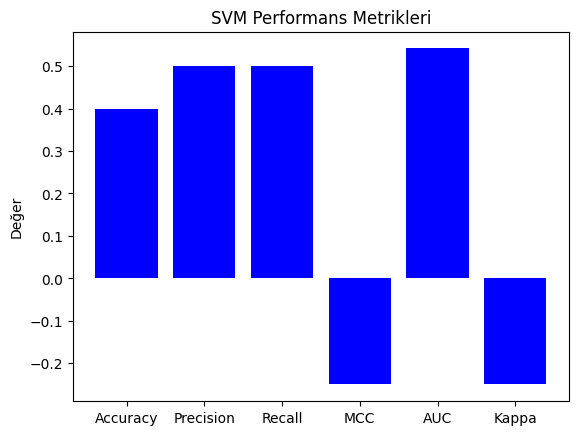

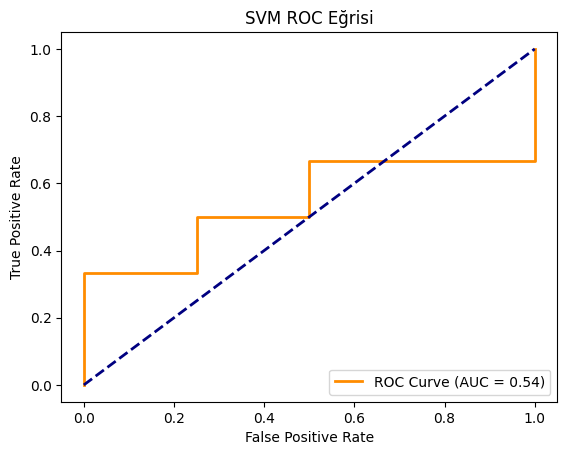

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, matthews_corrcoef,
                             roc_auc_score, cohen_kappa_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('/content/drive/My Drive/protein_epip_features.csv')
X = df.iloc[:, 1:].values
y = np.random.randint(0, 2, len(df))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("SVM Modeli Eğitiliyor...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_predictions = svm_model.predict(X_test_scaled)
svm_probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]


svm_metrics = {
    "Accuracy": accuracy_score(y_test, svm_predictions),
    "Precision": precision_score(y_test, svm_predictions),
    "Recall": recall_score(y_test, svm_predictions),
    "MCC": matthews_corrcoef(y_test, svm_predictions),
    "AUC": roc_auc_score(y_test, svm_probabilities),
    "Kappa": cohen_kappa_score(y_test, svm_predictions),
}


for metric, value in svm_metrics.items():
    print(f"SVM {metric}: {value:.2f}")


svm_cm = confusion_matrix(y_test, svm_predictions)
print("SVM Hata Matrisi:")
print(svm_cm)


plt.bar(svm_metrics.keys(), svm_metrics.values(), color='blue')
plt.title("SVM Performans Metrikleri")
plt.ylabel("Değer")
plt.show()


fpr, tpr, _ = roc_curve(y_test, svm_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

1D-CNN Modeli

1D-CNN Modeli Eğitiliyor...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.5062 - loss: 0.9587 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4625 - loss: 0.7873 - val_accuracy: 0.6000 - val_loss: 0.6906
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3917 - loss: 0.9796 - val_accuracy: 0.6000 - val_loss: 0.7367
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4521 - loss: 0.9428 - val_accuracy: 0.6000 - val_loss: 0.7646
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4896 - loss: 0.9653 - val_accuracy: 0.6000 - val_loss: 0.7658
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 1.1813 - val_accuracy: 0.6000 - val_loss: 0.7369
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4562 - loss: 1.0114 - val_accuracy: 0.6000 - val_loss: 0.7017
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5708 - loss: 0.8058 - val_accuracy: 0.6000 - val_loss: 0.6779
Epoch 9/20

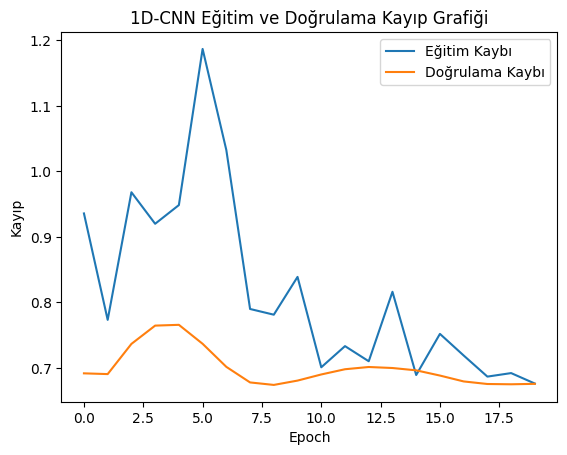

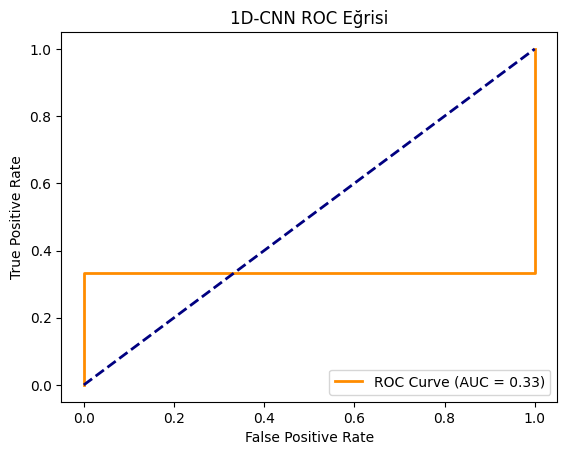

1D-CNN Hata Matrisi:
[[0 4]
 [0 6]]


In [10]:
print("1D-CNN Modeli Eğitiliyor...")
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]
y_train_cnn = to_categorical(y_train, num_classes=2)
y_test_cnn = to_categorical(y_test, num_classes=2)

cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))


y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_class = np.argmax(y_pred_cnn, axis=1)
y_test_labels = np.argmax(y_test_cnn, axis=1)

cnn_metrics = {
    "Accuracy": accuracy_score(y_test_labels, y_pred_cnn_class),
    "Precision": precision_score(y_test_labels, y_pred_cnn_class),
    "Recall": recall_score(y_test_labels, y_pred_cnn_class),
    "MCC": matthews_corrcoef(y_test_labels, y_pred_cnn_class),
    "AUC": roc_auc_score(y_test_labels, y_pred_cnn[:, 1]),
    "Kappa": cohen_kappa_score(y_test_labels, y_pred_cnn_class),
}


for metric, value in cnn_metrics.items():
    print(f"1D-CNN {metric}: {value:.2f}")


plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title("1D-CNN Eğitim ve Doğrulama Kayıp Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_test_labels, y_pred_cnn[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('1D-CNN ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


cnn_cm = confusion_matrix(y_test_labels, y_pred_cnn_class)
print("1D-CNN Hata Matrisi:")
print(cnn_cm)